# GRADIENT DESCENT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("salary_data.csv")

In [3]:
# data = data.sample(frac = 1)

In [4]:
data_train  = data.iloc[0 : 20 , [0 , 1]]

data_train.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data_train.shape

(20, 2)

In [6]:
data_test = data.iloc[20 : ]

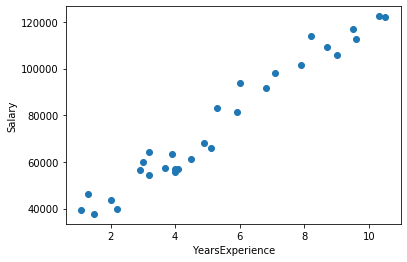

In [7]:
plt.scatter(data["YearsExperience"] , data["Salary"]) 
plt.xlabel("YearsExperience") 
plt.ylabel("Salary")
plt.show()

In [8]:
x = data_train["YearsExperience"]
y = data_train["Salary"]

In [9]:
x_test = data_test["YearsExperience"]
y_test = data_test["Salary"]

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [12]:
x.shape

(20,)

In [13]:
n = len(data_train["YearsExperience"])
n

20

In [14]:
x_bias = np.ones((n , 1))

In [15]:
x = np.reshape(x , (n , 1))

In [16]:
x.shape

(20, 1)

In [17]:
x_new = np.append(x_bias , x , axis = 1)

In [18]:
x_new[0 : 3]

array([[1. , 1.1],
       [1. , 1.3],
       [1. , 1.5]])

In [19]:
n1 = len(data_test["YearsExperience"])
n1

10

In [20]:
x_bias1 = np.ones((n1 , 1))

In [21]:
x_test = np.reshape(x_test , (n1 , 1))

In [22]:
x_test = np.append(x_bias1 , x_test , axis = 1)

In [23]:
y = np.reshape(y , (n , 1))

MODEL

In [24]:
def model(x , y , learning_rate , iteration) :
    
    m = y.size                                   
    theta = np.zeros((x.shape[1] , 1))
    cost_list = []
    

    for i in range(iteration) :
        
        y_pred = np.dot(x , theta)
        
        cost = (1/(2*m))*np.sum(np.square(y_pred - y))
        
        d_theta = (1/m)*np.dot(x.T , y_pred - y)
        
        theta = theta - (learning_rate * d_theta)
        
        cost_list.append(cost)
        
        if(i%(iteration/10) == 0) :
            
            print("cost : " , cost)
            print(d_theta)
            print(theta)
            
    return theta , cost_list

In [25]:
iteration = 100000
learning_rate = 0.008     #0.1

theta , cost_list = model(x_new , y , learning_rate , iteration)

cost :  1861912861.625
[[ -59304.25]
 [-231589.38]]
[[ 474.434  ]
 [1852.71504]]
cost :  18238856.232691117
[[-0.09273462]
 [ 0.02248176]]
[[26576.68561466]
 [ 9116.28739469]]
cost :  18238856.19758282
[[-2.88158590e-06]
 [ 6.98577787e-07]]
[[26577.39999731]
 [ 9116.11420607]]
cost :  18238856.1975828
[[-2.26646080e-10]
 [ 1.12049747e-10]]
[[26577.40001951]
 [ 9116.11420069]]
cost :  18238856.1975828
[[-2.26646080e-10]
 [ 1.12049747e-10]]
[[26577.40001951]
 [ 9116.11420069]]
cost :  18238856.1975828
[[-2.26646080e-10]
 [ 1.12049747e-10]]
[[26577.40001951]
 [ 9116.11420069]]
cost :  18238856.1975828
[[-2.26646080e-10]
 [ 1.12049747e-10]]
[[26577.40001951]
 [ 9116.11420069]]
cost :  18238856.1975828
[[-2.26646080e-10]
 [ 1.12049747e-10]]
[[26577.40001951]
 [ 9116.11420069]]
cost :  18238856.1975828
[[-2.26646080e-10]
 [ 1.12049747e-10]]
[[26577.40001951]
 [ 9116.11420069]]
cost :  18238856.1975828
[[-2.26646080e-10]
 [ 1.12049747e-10]]
[[26577.40001951]
 [ 9116.11420069]]


In [26]:
print(theta)

[[26577.40001951]
 [ 9116.11420069]]


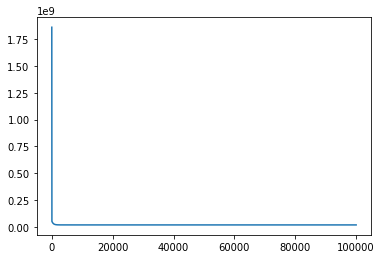

In [27]:
rng = np.arange(0 , iteration)
plt.plot(rng , cost_list)
plt.show()

In [28]:
y_pred = np.dot(x_test , theta)

In [29]:
y_pred

array([[ 88566.97658422],
       [ 91301.81084443],
       [ 98594.70220499],
       [101329.5364652 ],
       [105887.59356554],
       [108622.42782575],
       [113180.4849261 ],
       [114092.09634617],
       [120473.37628665],
       [122296.59912679]])

In [30]:
df = pd.DataFrame(y_test)
df['Predicted'] = y_pred

df.columns = ['Actual' , 'Predicted']

In [31]:
df

,Actual,Predicted
0,91738,88566.976584
1,98273,91301.810844
2,101302,98594.702205
3,113812,101329.536465
4,109431,105887.593566
5,105582,108622.427826
6,116969,113180.484926
7,112635,114092.096346
8,122391,120473.376287
9,121872,122296.599127
